In [ ]:
import cdsapi

dataset = "reanalysis-era5-land-timeseries"
request = {
    "variable": [
        "2m_temperature",
        "total_precipitation",
        "10m_u_component_of_wind",
        "10m_v_component_of_wind"
    ],
    "location": {"longitude": 12.7, "latitude": 37.7},
    "date": ["2016-01-01/2025-04-30"],
    "data_format": "netcdf"
}

client = cdsapi.Client()
#client.retrieve(dataset, request).download()


2025-12-05 16:44:47,934 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


2025-12-05 16:44:48,034 WARNING [2025-06-04T00:00:00] This dataset provides user-selected location timeseries of [ERA5 Land data](https://doi.org/10.24381/cds.e2161bac) for a limited set of variables. Its content may be undergo changes over time (e.g. file format, data file structure, deprecation etc) and is **not recommended for use in a production environment**. 

For users interested in large regions, the original ERA5 Land catalogue entry remains the more efficient option. 
We will make every effort to notify users of changes, either through this banner and/or the [Forum](https://forum.ecmwf.int/).
2025-12-05 16:44:48,034 INFO Request ID is c0b59f2f-aca1-4f6b-b03b-932b5694ea6f
2025-12-05 16:44:48,068 INFO status has been updated to accepted
2025-12-05 16:45:37,713 INFO status has been updated to successful


b7e302a11fefed57ef42195e8eb18350.zip:   0%|          | 0.00/3.17M [00:00<?, ?B/s]

'b7e302a11fefed57ef42195e8eb18350.zip'

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from windrose import WindroseAxes
from matplotlib.patches import Patch

In [60]:
era_winds = xr.open_dataset("../data_meteo/reanalysis-era5-land-timeseries-sfc-windm2gcwaxa.nc")
era_winds

<xarray.Dataset> Size: 1MB
Dimensions:     (valid_time: 81792)
Coordinates:
    latitude    float64 8B ...
    longitude   float64 8B ...
  * valid_time  (valid_time) datetime64[ns] 654kB 2016-01-01 ... 2025-04-30T2...
Data variables:
    u10         (valid_time) float32 327kB ...
    v10         (valid_time) float32 327kB ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2025-04-28T07:44 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [37]:
era_winds.v10

<xarray.DataArray 'v10' (valid_time: 81792)> Size: 327kB
[81792 values with dtype=float32]
Coordinates:
    latitude    float64 8B ...
    longitude   float64 8B ...
  * valid_time  (valid_time) datetime64[ns] 654kB 2016-01-01 ... 2025-04-30T2...
Attributes: (12/30)
    GRIB_NV:                                  0
    GRIB_Nx:                                  3600
    GRIB_Ny:                                  1801
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           v10
    GRIB_dataType:                            fc
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         surface
    GRIB_units:                               m s**-1
    long_name:                                10 metre V wind component
    standard_name:                            unknown
    units:                                    m s**-1

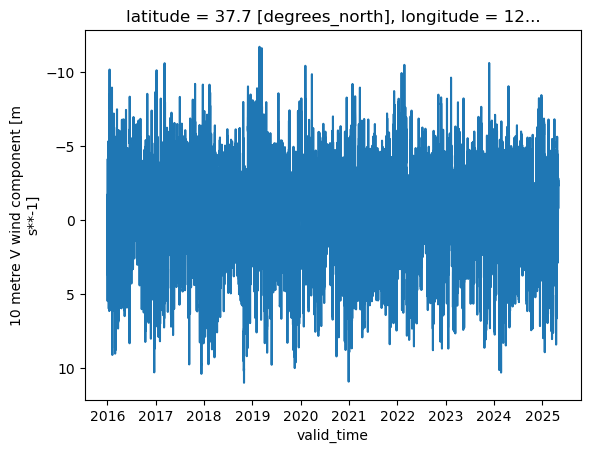

In [39]:
era_winds.v10.plot.line(x="valid_time", yincrease=False)

In [61]:
era_df = era_winds.to_dataframe()

In [62]:
u = era_winds.u10.values
v = era_winds.v10.values


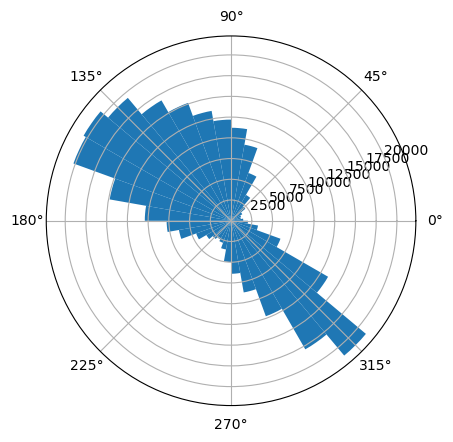

In [63]:
speed = np.sqrt(u**2 + v**2)
theta = np.degrees(np.arctan2(u, v))
direction = (270 - theta) % 360

plt.figure()
plt.subplot(polar=True)
plt.hist(np.deg2rad(direction), bins=36, weights=speed)
plt.show()

In [64]:
era_df["ws"] = speed
era_df["wd"] = direction
era_df["datetime"] = era_df.index
era_df = era_df[era_df['ws'] > 0.5]
start_date = '2016-01-01'
end_date = '2019-12-31'

# Create subset
mask = (era_df['datetime'] >= start_date) & (era_df['datetime'] <= end_date)
df_subset = era_df.loc[mask].copy()
df_subset

,u10,v10,latitude,longitude,ws,wd,datetime
valid_time,,,,,,,
2016-01-01 00:00:00,-1.100266,-1.714140,37.7,12.7,2.036875,57.304565,2016-01-01 00:00:00
2016-01-01 01:00:00,-1.047533,-1.550070,37.7,12.7,1.870840,55.949280,2016-01-01 01:00:00
2016-01-01 02:00:00,-1.040606,-1.409298,37.7,12.7,1.751851,53.558350,2016-01-01 02:00:00
2016-01-01 03:00:00,-1.162491,-1.227697,37.7,12.7,1.690747,46.562683,2016-01-01 03:00:00
2016-01-01 04:00:00,-1.558640,-1.033508,37.7,12.7,1.870160,33.547699,2016-01-01 04:00:00
...,...,...,...,...,...,...,...
2019-12-30 20:00:00,-3.574585,-4.141891,37.7,12.7,5.471099,49.204773,2019-12-30 20:00:00
2019-12-30 21:00:00,-3.702744,-3.734589,37.7,12.7,5.259037,45.245300,2019-12-30 21:00:00
2019-12-30 22:00:00,-3.553162,-3.674683,37.7,12.7,5.111580,45.963196,2019-12-30 22:00:00


Figure exported as 'ERA5_wind_rose_analysis.png' with 300 DPI and white background


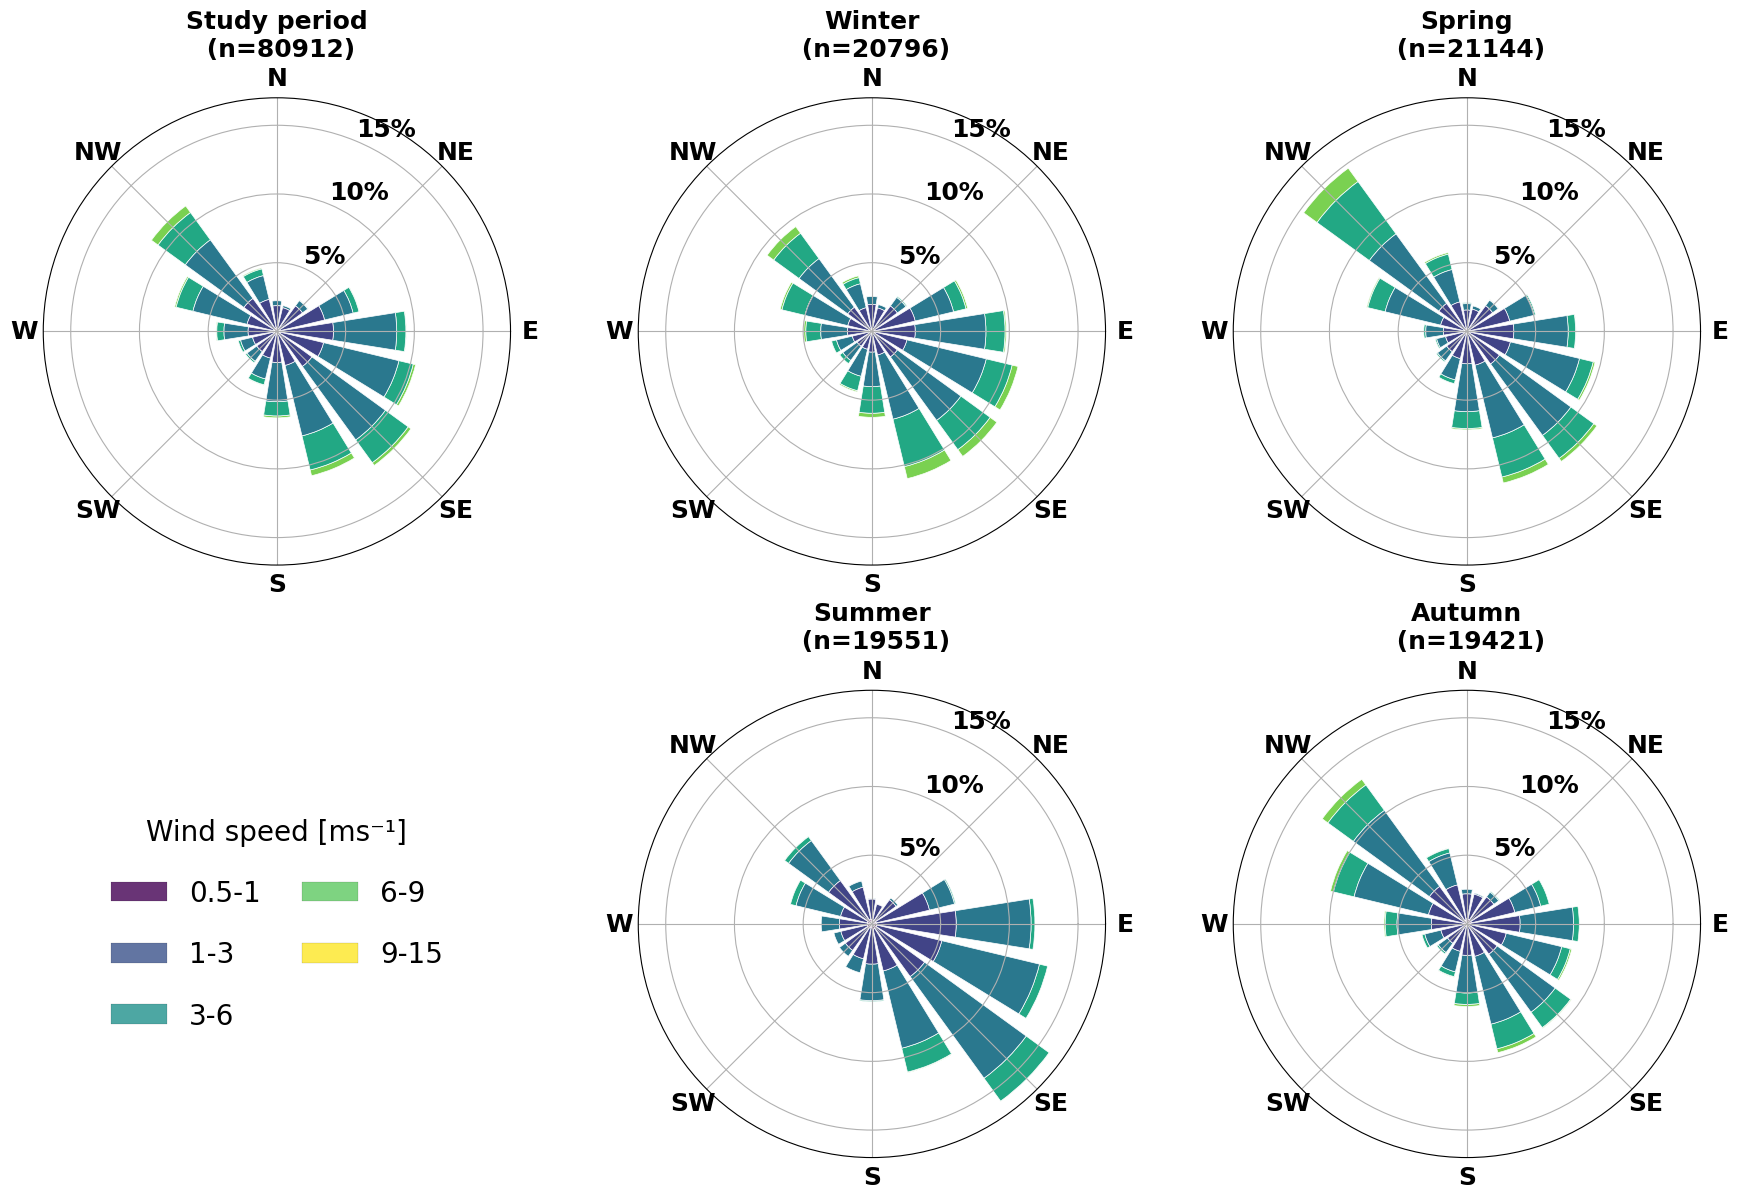

In [ ]:
def export_as_png_high_quality_all_white(df='era_df', ws_col='ws', direction_col='wd', datetime_col='datetime', 
                                       filename='wind_rose_analysis.png'):
    """
    Version with white background for all subplots
    """
    # Make sure datetime column is in datetime format
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    
    # Define seasons
    def get_season(month):
        if month in [12, 1, 2]: return 'Winter'
        elif month in [3, 4, 5]: return 'Spring'
        elif month in [6, 7, 8]: return 'Summer'
        else: return 'Autumn'
    
    # Add season column
    df['season'] = df[datetime_col].dt.month.apply(get_season)
    
    # Create figure with white background
    fig = plt.figure(figsize=(18, 12), facecolor='white')
    
    # Define wind speed bins
    speed_bins = [0.5, 1,  3,  6,  9, 15] #era_df['ws'].max()
    legend_labels = [f'{speed_bins[i]}-{speed_bins[i+1]}' for i in range(len(speed_bins)-1)]
    
    # Create custom colors
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=0, vmax=len(speed_bins)-2)
    legend_colors = [cmap(norm(i)) for i in range(len(speed_bins)-1)]
    
    # Plot wind roses in positions 1, 2, 3, 5, 6
    plot_positions = [1, 2, 3, 5, 6]
    plot_titles = ['Study period', 'Winter', 'Spring', 'Summer', 'Autumn']
    
    for i, (pos, title) in enumerate(zip(plot_positions, plot_titles)):
        ax = plt.subplot(2, 3, pos, projection='windrose')
        ax.set_facecolor('white')  # White background for wind rose plots
        
        if title == 'Study period':
            data = df
        else:
            data = df[df['season'] == title]
        
        ws = data[ws_col].values
        wd = data[direction_col].values
        
        # Filter out NaN values
        mask = ~np.isnan(ws) & ~np.isnan(wd)
        ws = ws[mask]
        wd = wd[mask]
        
        if len(ws) > 0:
            ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', 
                  linewidth=0.5, bins=speed_bins, cmap=cmap)
        
        # Set wind frequency values font size (radial labels)
        ax.set_yticks([ 5, 10, 15, 20])
        ax.set_yticklabels(['5%', '10%', '15%', '20%'], fontsize=18, fontweight='bold')
        
        # Set wind sectors/directions font size (angular labels)
        ax.set_xticklabels(['E', 'NE','N','NW' , 'W', 'SW', 'S','SE' ], fontsize=18, fontweight='bold')
        
        ax.set_ylim(0, 17)
        ax.set_title(f'{title}\n (n={len(ws)})\n', fontsize=18, fontweight='bold', pad=10)
    
    # Create legend in tile 4 (position 4) with two columns
    ax_legend = plt.subplot(2, 3, 4)
    ax_legend.set_facecolor('#ffffff')  # WHITE BACKGROUND
    

    # Remove axes
    ax_legend.set_xticks([])
    ax_legend.set_yticks([])
    for spine in ax_legend.spines.values():
        spine.set_visible(False)
    
    # Add title
    #ax_legend.text(0.5, 0.95, 'Legend', transform=ax_legend.transAxes,
     #             fontsize=18, fontweight='bold', ha='center', va='top')
    
    # Create legend elements
    legend_elements = [Patch(facecolor=color, edgecolor='black', linewidth=0.1, 
                           label=label, alpha=0.8) 
                      for color, label in zip(legend_colors, legend_labels)]
    
    # Create two-column legend
    legend = ax_legend.legend(
        handles=legend_elements,
        title='Wind speed [ms⁻¹]',
        loc='center',
        fontsize=20,
        title_fontsize=20,
        frameon=True,
        fancybox=True,
        shadow=False,
        facecolor='white',
        edgecolor='white',
        borderpad=1.2,
        labelspacing=1.2,
        ncol=2,
        columnspacing=1.5
    )
    
    #legend.get_title().set_fontweight('bold')
    
    # Add informative text
    #ax_legend.text(0.5, 0.05, 'Frequency circles: 0%, 5%, 10%, 15%', 
     #             transform=ax_legend.transAxes, fontsize=10, 
    #              ha='center', va='bottom', style='italic')
    
    # Main title
   # plt.suptitle('Seasonal Wind Rose Analysis', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    
    # Export as PNG with white background
    plt.savefig(filename, 
                dpi=300,
                format='png',
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none',
                transparent=False)
    
    print(f"Figure exported as '{filename}' with 300 DPI and white background")
    
    plt.show()
    return fig

# Usage with all white backgrounds:
fig = export_as_png_high_quality_all_white(era_df, filename='ERA5_wind_rose_analysis.png')

In [66]:
meteo_CG_16_19_filt = era_df

In [ ]:
# First, let's check what your dataframe looks like
print("=== DATAFRAME INFO ===")
print(f"Shape: {meteo_CG_16_19_filt.shape}")
print(f"\nColumns: {meteo_CG_16_19_filt.columns.tolist()}")
print(f"\nIndex type: {type(meteo_CG_16_19_filt.index)}")
print(f"Index name: {meteo_CG_16_19_filt.index.name}")


print("\n=== DATATYPES ===")
print(meteo_CG_16_19_filt.dtypes)

# SOLUTION 1: If 'starttime_dt' is a column (most common case)
if 'starttime_dt' in meteo_CG_16_19_filt.columns:
    print("\n=== SOLUTION 1: Using 'starttime_dt' column ===")
    
    # Convert to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(meteo_CG_16_19_filt['starttime_dt']):
        print("Converting 'starttime_dt' to datetime...")
        meteo_CG_16_19_filt['starttime_dt'] = pd.to_datetime(meteo_CG_16_19_filt['starttime_dt'])
    
    # Extract month from the COLUMN (using .dt.month)
    meteo_CG_16_19_filt['month'] = meteo_CG_16_19_filt['starttime_dt'].dt.month
    meteo_CG_16_19_filt['month_name'] = meteo_CG_16_19_filt['starttime_dt'].dt.month_name()
    
    print("✓ Added month from column")
    print(meteo_CG_16_19_filt[['starttime_dt', 'ws', 'wd', 'month', 'month_name']].head())

# SOLUTION 2: If you want to use the index (and 'starttime_dt' is the index name)
elif meteo_CG_16_19_filt.index.name == 'starttime_dt':
    print("\n=== SOLUTION 2: Converting index to datetime ===")
    
    # Convert the index to datetime
    meteo_CG_16_19_filt.index = pd.to_datetime(meteo_CG_16_19_filt.index)
    
    # Now you can use .month on the index
    meteo_CG_16_19_filt['month'] = meteo_CG_16_19_filt.index.month
    
    
    print("✓ Added month from datetime index")
    print(meteo_CG_16_19_filt[['ws', 'wd', 'month']].head())

# SOLUTION 3: If the index contains datetime strings but isn't named
else:
    print("\n=== SOLUTION 3: Generic approach ===")
    
    # Try to convert index to datetime
    try:
        meteo_CG_16_19_filt.index = pd.to_datetime(meteo_CG_16_19_filt.index)
        meteo_CG_16_19_filt['month'] = meteo_CG_16_19_filt.index.month
        print("✓ Converted index to datetime and added month")
    except:
        print("✗ Could not convert index to datetime")
        
        # Last resort: check if any column looks like datetime
        for col in meteo_CG_16_19_filt.columns:
            if any(keyword in col.lower() for keyword in ['time', 'date', 'datetime']):
                print(f"Trying column: {col}")
                try:
                    meteo_CG_16_19_filt['month'] = pd.to_datetime(meteo_CG_16_19_filt[col]).dt.month
                    print(f"✓ Added month from column '{col}'")
                    break
                except:
                    continue

# Add season based on month
if 'month' in meteo_CG_16_19_filt.columns:
    print("\n=== ADDING SEASON ===")
    
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    
    meteo_CG_16_19_filt['season'] = meteo_CG_16_19_filt['month'].apply(get_season)
    
    print("✓ Added season column")
    print(f"\nSeason distribution:")
    print(meteo_CG_16_19_filt['season'].value_counts())
    
    print(f"\nMonth distribution:")
    

# Final check
print("\n=== FINAL DATAFRAME INFO ===")
print(f"Columns: {meteo_CG_16_19_filt.columns.tolist()}")
print(f"\nFirst few rows with new columns:")
cols_to_show = []
for col in ['starttime_dt', 'ws', 'wd', 'month',  'season']:
    if col in meteo_CG_16_19_filt.columns:
        cols_to_show.append(col)
print(meteo_CG_16_19_filt[cols_to_show].head())

=== DATAFRAME INFO ===
Shape: (80912, 7)

Columns: ['u10', 'v10', 'latitude', 'longitude', 'ws', 'wd', 'datetime']

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index name: valid_time

=== DATATYPES ===
u10                 float32
v10                 float32
latitude            float64
longitude           float64
ws                  float32
wd                  float32
datetime     datetime64[ns]
dtype: object

=== SOLUTION 3: Generic approach ===
✓ Converted index to datetime and added month

=== ADDING SEASON ===
✓ Added season column

Season distribution:
season
Spring    21144
Winter    20796
Summer    19551
Autumn    19421
Name: count, dtype: int64

Month distribution:

=== FINAL DATAFRAME INFO ===
Columns: ['u10', 'v10', 'latitude', 'longitude', 'ws', 'wd', 'datetime', 'month', 'season']

First few rows with new columns:
                     month  season
valid_time                        
2016-01-01 00:00:00      1  Winter
2016-01-01 01:00:00      1  Winter
2

✓ Winter: 20796 data points
✓ Spring: 21144 data points
✓ Summer: 19551 data points
✓ Autumn: 19421 data points

Creating individual wind rose plots for each season...


/tmp/ipykernel_3620966/1906406563.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Winter wind rose saved as 'wind_rose_winter.png'


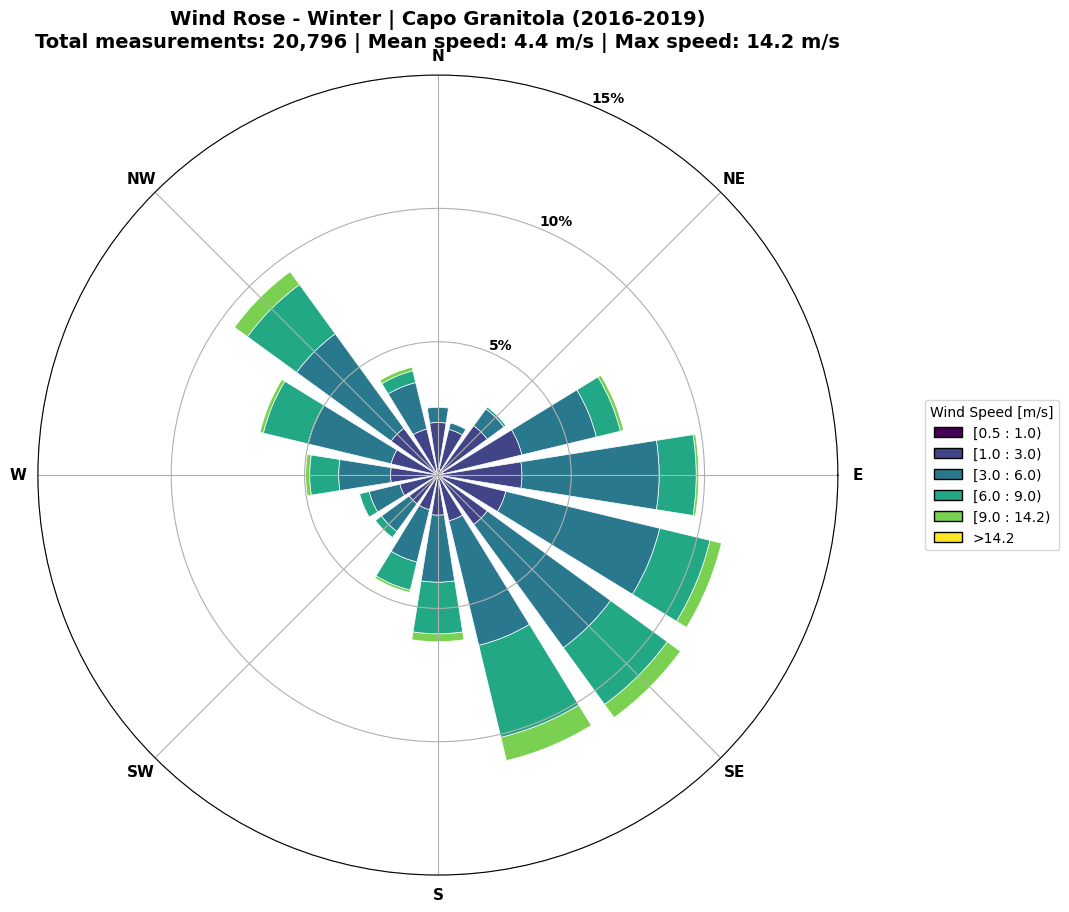

/tmp/ipykernel_3620966/1906406563.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Spring wind rose saved as 'wind_rose_spring.png'


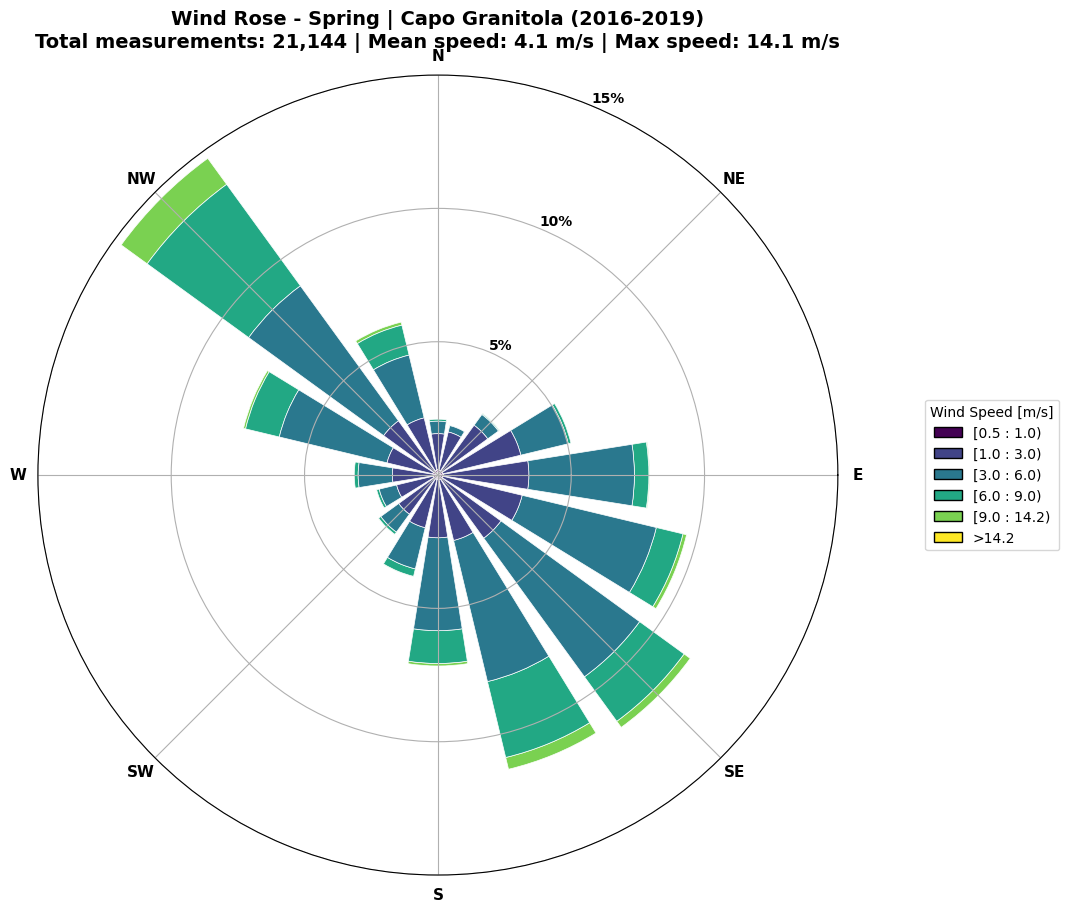

/tmp/ipykernel_3620966/1906406563.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Summer wind rose saved as 'wind_rose_summer.png'


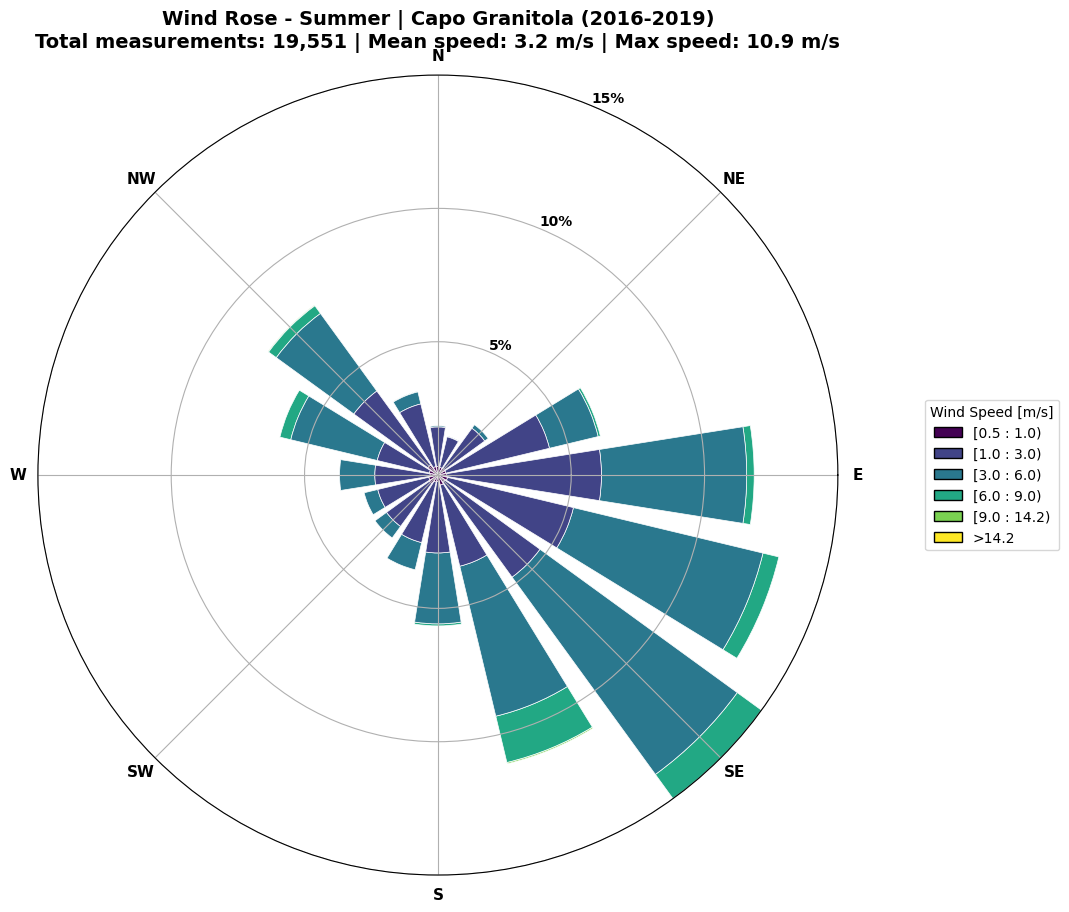

/tmp/ipykernel_3620966/1906406563.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Autumn wind rose saved as 'wind_rose_autumn.png'


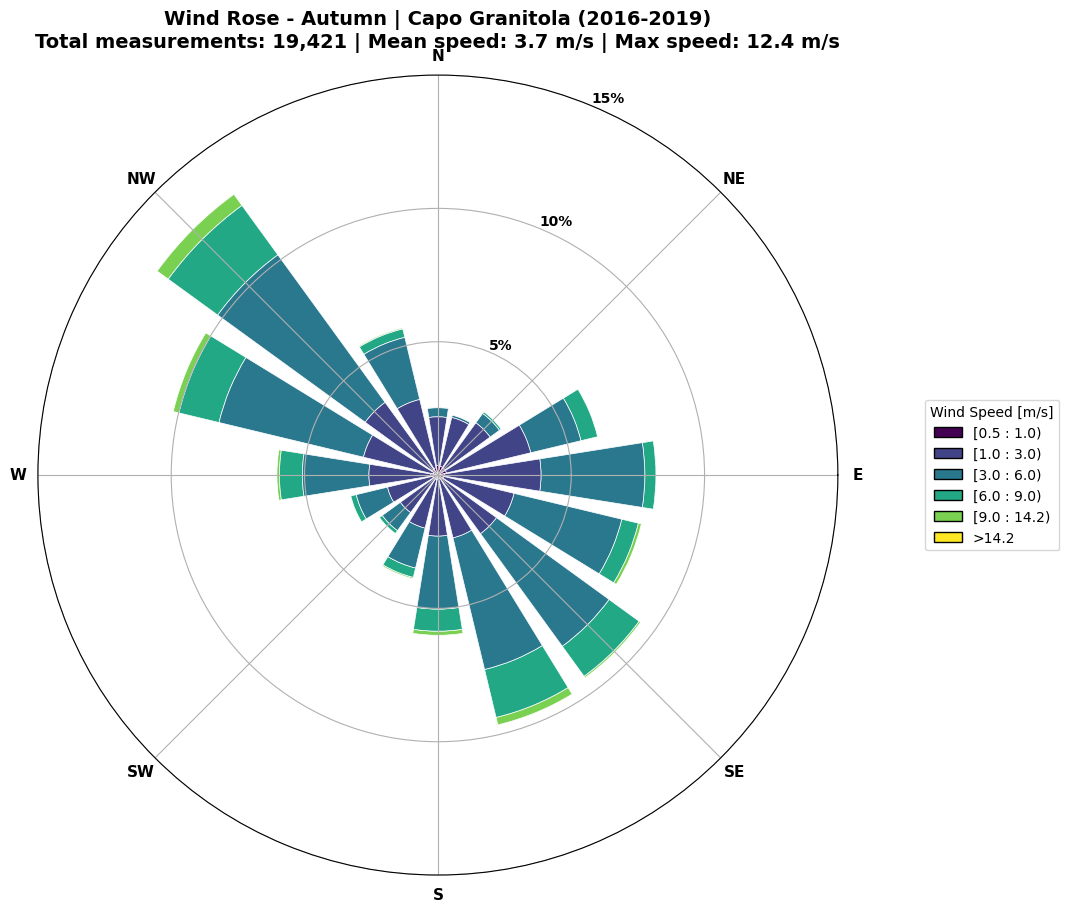


Creating combined plot for 4 seasons...
✓ Combined seasonal plot saved as 'wind_rose_seasons_combined.png'


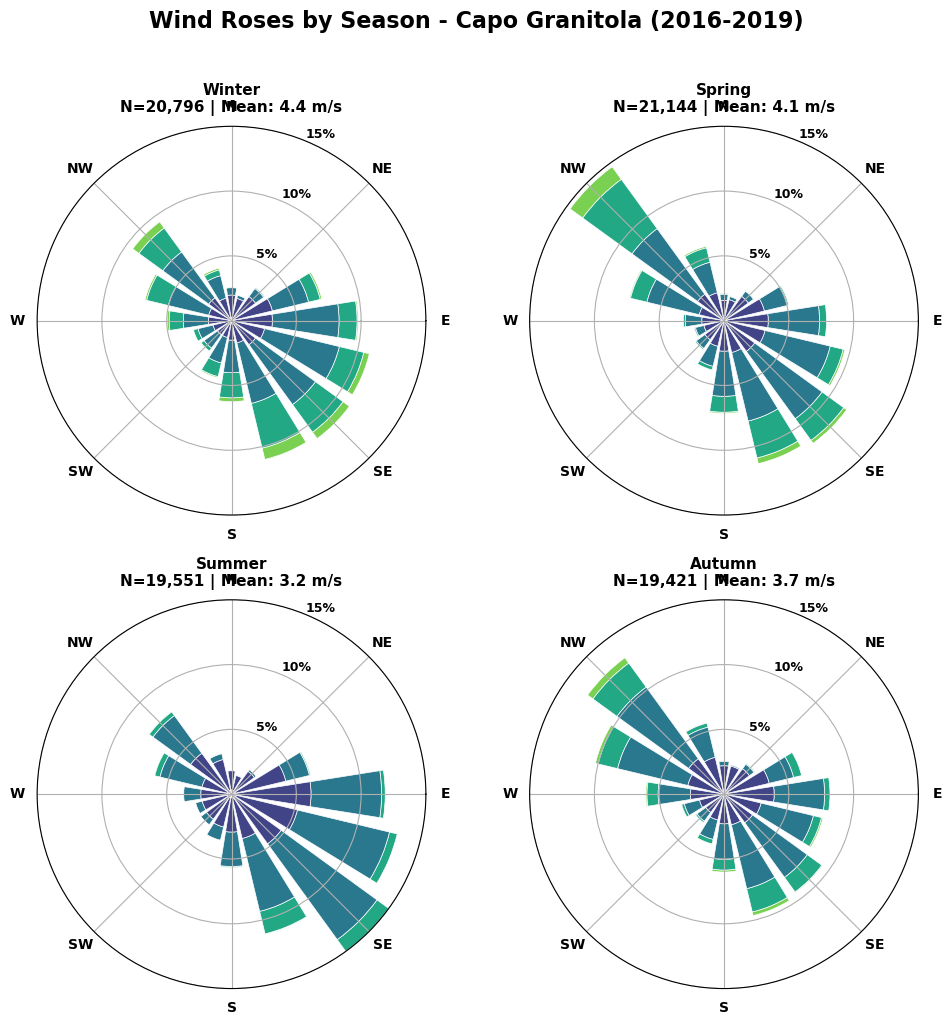


SEASONAL WIND STATISTICS

Seasonal Statistics Summary:
Season     N  Mean Speed (m/s)  Std Speed (m/s)  Max Speed (m/s)  Min Speed (m/s)  Mean Direction (°) Prevailing Direction
Winter 20796              4.37             2.27            14.17             0.50              176.75                    E
Spring 21144              4.07             2.13            14.11             0.50              190.54                   SE
Summer 19551              3.18             1.57            10.88             0.50              168.56                    E
Autumn 19421              3.71             1.97            12.36             0.50              195.00                    W

✓ Seasonal statistics saved to 'seasonal_wind_statistics.csv'

MONTHLY WIND ANALYSIS

Monthly Statistics:
         ws                                   wd            
      count  mean   std    max   min        mean         std
month                                                       
1      7383  4.47  2.28  13.60  0.50  1

In [68]:


# Assuming meteo_CG_16_19_filt has columns: ['ws', 'wd', 'month', 'season']

# Get overall statistics for consistent binning
overall_max_speed = meteo_CG_16_19_filt['ws'].max()
speed_bins = [0.5, 1, 3, 6, 9, overall_max_speed]
bin_labels = [
    '0.5-1',     
    '1-3',       
    '3-6',       
    '6-9',       
    f'9-{overall_max_speed:.1f}'      
]

# Define seasons in order
seasons_order = ['Winter', 'Spring', 'Summer', 'Autumn']

# Check which seasons actually have data
seasons_with_data = []
for season in seasons_order:
    season_data = meteo_CG_16_19_filt[meteo_CG_16_19_filt['season'] == season]
    if len(season_data) > 0:
        seasons_with_data.append(season)
        print(f"✓ {season}: {len(season_data)} data points")
    else:
        print(f"✗ {season}: No data")

# Create individual plots for each season with data
print("\n" + "="*60)
print("Creating individual wind rose plots for each season...")
print("="*60)

for season in seasons_with_data:
    # Filter data for this season
    season_data = meteo_CG_16_19_filt[meteo_CG_16_19_filt['season'] == season]
    
    ws_season = season_data['ws'].values
    wd_season = season_data['wd'].values
    
    # Calculate statistics
    total_points = len(ws_season)
    mean_speed = np.mean(ws_season)
    max_speed = np.max(ws_season)
    
    # Create individual figure
    fig_ind = plt.figure(figsize=(12, 10))
    ax_ind = WindroseAxes.from_ax(fig=fig_ind)
    
    # Plot
    bars = ax_ind.bar(wd_season, ws_season, normed=True, opening=0.8, edgecolor='white',
                      linewidth=0.5, bins=speed_bins, cmap=plt.cm.viridis)
    
    # Customize
    ax_ind.set_yticks([5, 10, 15])
    ax_ind.set_yticklabels(['5%', '10%', '15%'], fontsize=10, fontweight='bold')
    ax_ind.set_ylim(0, 15)
    ax_ind.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                           fontsize=11, fontweight='bold')
    
    # Legend
    legend = ax_ind.legend(title='Wind Speed [m/s]', loc='center left',
                           bbox_to_anchor=(1.1, 0.5), labels=bin_labels)
    
    # Title with statistics
    plt.title(f'Wind Rose - {season} | Capo Granitola (2016-2019)\n'
              f'Total measurements: {total_points:,} | '
              f'Mean speed: {mean_speed:.1f} m/s | '
              f'Max speed: {max_speed:.1f} m/s',
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    # Save individual plot
    filename = f'wind_rose_{season.lower()}.png'
    fig_ind.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"✓ {season} wind rose saved as '{filename}'")
    
    plt.show()

# Now create a combined plot ONLY if we have data for multiple seasons
if len(seasons_with_data) > 1:
    print("\n" + "="*60)
    print(f"Creating combined plot for {len(seasons_with_data)} seasons...")
    print("="*60)
    
    # Determine grid layout
    n_seasons = len(seasons_with_data)
    if n_seasons <= 2:
        n_rows, n_cols = 1, n_seasons
    elif n_seasons <= 4:
        n_rows, n_cols = 2, 2
    else:
        n_rows, n_cols = (n_seasons + 1) // 2, 2
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), 
                             subplot_kw=dict(projection='windrose'))
    fig.suptitle('Wind Roses by Season - Capo Granitola (2016-2019)', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    # Flatten axes if needed
    if n_seasons > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Hide unused axes
    for i in range(n_seasons, len(axes)):
        axes[i].set_visible(False)
    
    # Plot wind rose for each season with data
    handles_list = []
    labels_list = []
    
    for idx, season in enumerate(seasons_with_data):
        if idx >= len(axes):
            break
            
        # Filter data for this season
        season_data = meteo_CG_16_19_filt[meteo_CG_16_19_filt['season'] == season]
        
        ws_season = season_data['ws'].values
        wd_season = season_data['wd'].values
        
        # Calculate season statistics
        total_points = len(ws_season)
        mean_speed = np.mean(ws_season)
        max_speed = np.max(ws_season)
        
        # Create wind rose for this season
        ax = axes[idx]
        bars = ax.bar(wd_season, ws_season, normed=True, opening=0.8, edgecolor='white',
                      linewidth=0.5, bins=speed_bins, cmap=plt.cm.viridis)
        
        # Customize this subplot
        ax.set_title(f'{season}\nN={total_points:,} | Mean: {mean_speed:.1f} m/s',
                     fontsize=11, fontweight='bold', pad=10)
        
        # Set radial grid
        ax.set_yticks([5, 10, 15])
        ax.set_yticklabels(['5%', '10%', '15%'], fontsize=9, fontweight='bold')
        ax.set_ylim(0, 15)
        
        # Set directional labels
        ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'],
                           fontsize=10, fontweight='bold')
        
        # Store handles and labels for legend
        if idx == 0:  # Only need one set for legend
            handles, labels = ax.get_legend_handles_labels()
            handles_list.extend(handles)
            labels_list.extend(labels)
    
    # Adjust layout
    plt.tight_layout()
    
    # Add a global legend if we have handles
    if handles_list and labels_list:
        fig.legend(handles_list, bin_labels, title='Wind Speed [m/s]',
                   loc='center right', bbox_to_anchor=(1.05, 0.5),
                   fontsize=10, title_fontsize=11)
    
    # Save the combined seasonal plot
    output_filename_combined = 'wind_rose_seasons_combined.png'
    fig.savefig(output_filename_combined, dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    print(f"✓ Combined seasonal plot saved as '{output_filename_combined}'")
    
    plt.show()

# COMPARISON STATISTICS TABLE
print("\n" + "="*60)
print("SEASONAL WIND STATISTICS")
print("="*60)

seasonal_stats = []
for season in seasons_order:
    season_data = meteo_CG_16_19_filt[meteo_CG_16_19_filt['season'] == season]
    
    if len(season_data) > 0:
        # Calculate prevailing direction
        directions = season_data['wd'].values
        
        # Function to get prevailing direction
        def get_prevailing_direction(directions):
            if len(directions) == 0:
                return 'N/A'
            # Bin directions into 8 compass points
            bins = np.linspace(0, 360, 9)  # 0, 45, 90, 135, 180, 225, 270, 315, 360
            labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
            # Get histogram
            hist, _ = np.histogram(directions % 360, bins=bins)
            # Find max
            max_idx = np.argmax(hist)
            return labels[max_idx]
        
        stats = {
            'Season': season,
            'N': len(season_data),
            'Mean Speed (m/s)': season_data['ws'].mean(),
            'Std Speed (m/s)': season_data['ws'].std(),
            'Max Speed (m/s)': season_data['ws'].max(),
            'Min Speed (m/s)': season_data['ws'].min(),
            'Mean Direction (°)': season_data['wd'].mean(),
            'Prevailing Direction': get_prevailing_direction(directions)
        }
        seasonal_stats.append(stats)

# Convert to DataFrame
if seasonal_stats:
    stats_df = pd.DataFrame(seasonal_stats)
    print("\nSeasonal Statistics Summary:")
    print(stats_df.to_string(index=False, float_format='%.2f'))
    
    # Save statistics to CSV
    stats_df.to_csv('seasonal_wind_statistics.csv', index=False)
    print(f"\n✓ Seasonal statistics saved to 'seasonal_wind_statistics.csv'")
else:
    print("No seasonal statistics to display.")

# MONTHLY ANALYSIS
print("\n" + "="*60)
print("MONTHLY WIND ANALYSIS")
print("="*60)

# Create monthly wind roses if you have month data
if 'month' in meteo_CG_16_19_filt.columns:
    # Group by month
    monthly_stats = meteo_CG_16_19_filt.groupby('month').agg({
        'ws': ['count', 'mean', 'std', 'max', 'min'],
        'wd': ['mean', 'std']
    }).round(2)
    
    print("\nMonthly Statistics:")
    print(monthly_stats)
    
    # Save monthly stats
    monthly_stats.to_csv('monthly_wind_statistics.csv')
    print(f"\n✓ Monthly statistics saved to 'monthly_wind_statistics.csv'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print(f"Created plots for {len(seasons_with_data)} seasons: {', '.join(seasons_with_data)}")
if len(seasons_with_data) > 1:
    print("✓ Combined seasonal plot created")
print("✓ Individual seasonal plots created")
print("✓ Statistical summaries saved to CSV files")